In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from numpy import matlib
import keras

In [2]:
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)

In [3]:
jp_score = np.array([49, 58, 64, 65, 54, 58, 49, 67, 54, 66, 72, 66, 54, 64, 39, 
             56, 54, 56, 48, 57, 57, 47, 50, 60, 72, 54, 59, 61, 64, 70])

math_score = np.array([51, 58, 56, 70, 45, 70, 45, 69, 66, 73, 71, 72, 57, 53, 58, 
             57, 71, 63, 53, 62, 62, 59, 57, 65, 74, 66, 72, 50, 69, 60])

en_score = np.array([59, 63, 68, 77, 55, 71, 57, 79, 66, 81, 81, 77, 62, 67, 56,
             62, 70, 67, 61, 70, 68, 59, 61, 71, 77, 66, 70, 59, 68, 71])





In [4]:
subject_labels = ['Japanese score', 'Math score', 'English score']

In [5]:
mean_vector = np.array([jp_score.mean(), math_score.mean(), en_score.mean()])
data_matrix = np.c_[jp_score, math_score, en_score]
data_mean_reduced = data_matrix - mean_vector
covariance_matrix = np.dot(data_mean_reduced.T, data_mean_reduced) / len(jp_score)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
sorted_index = eigen_values.argsort()[::-1] 
eigen_values=eigen_values[sorted_index]
eigen_vectors=eigen_vectors[:, sorted_index]

In [6]:
eigen_values

array([148.33636162,  30.61903392,   3.59682668])

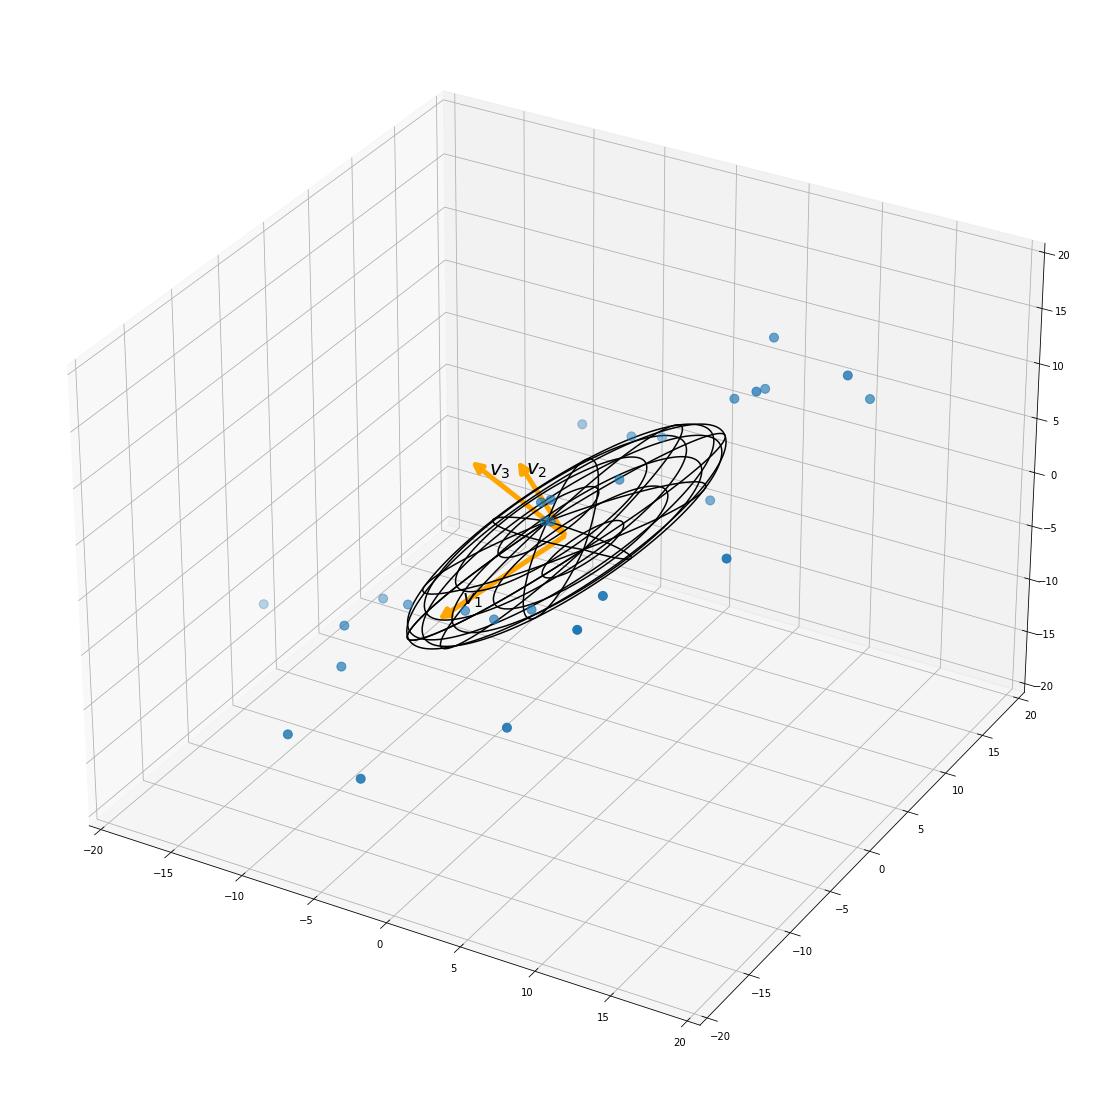

In [7]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 

phi = np.linspace(0,2 *np.pi, 256).reshape(256, 1) # the angle of the projection in the xy-plane 
theta = np.linspace(0, np.pi, 256).reshape(-1, 256) # the angle from the polar axis, ie the polar angle 

# Transformation formulae for a spherical coordinate system. 
#x = radius*np.sin(theta)*np.cos(phi) *eigen_values[0] / 15
#y = radius*np.sin(theta)*np.sin(phi) * eigen_values[1] /15
#z = radius*np.cos(theta) *eigen_values[2] /15
#z_temp = np.zeros((len(z[0]), len(z[0])))

x = np.sin(theta)*np.cos(phi) * np.sqrt(eigen_values[0])
y = np.sin(theta)*np.sin(phi) * np.sqrt(eigen_values[1])
z = np.cos(theta) * np.sqrt(eigen_values[2])
z_temp = np.zeros((len(z[0]), len(z[0])))

grid_range = 10

z_temp = np.zeros((len(z[0]), len(z[0])))

for i in range(len(z[0])):
    z_temp[i] = z

x_transformed, y_transformed, z_transformed = np.zeros(x.shape), np.zeros(y.shape), np.zeros(z_temp.shape)

temp_vec=np.zeros(3)

for i in range(len(z[0])):
    z_temp[i] = z

for i in range(len(x)):
    for j in range(len(y)):
        temp_vec[0] = x[i][j]
        temp_vec[1] = y[i][j]
        temp_vec[2] = z_temp[i][j]
        temp_vec = np.dot(eigen_vectors, temp_vec)
        x_transformed[i][j] = temp_vec[0]
        y_transformed[i][j] = temp_vec[1]
        z_transformed[i][j] = temp_vec[2]
        
fig = plt.figure(figsize=(20, 20)) # Square figure 
ax = fig.add_subplot(111, projection='3d') 

ax.scatter(data_mean_reduced[:, 0], data_mean_reduced[:, 1], data_mean_reduced[:, 2], marker='o', s=80)

axis_length = 10

ax.arrow3D(0, 0, 0, eigen_vectors.T[0][0]*axis_length, eigen_vectors.T[0][1]*axis_length, eigen_vectors.T[0][2]*axis_length,
                       mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, eigen_vectors.T[1][0]*axis_length, eigen_vectors.T[1][1]*axis_length, eigen_vectors.T[1][2]*axis_length,
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, eigen_vectors.T[2][0]*axis_length, eigen_vectors.T[2][1]*axis_length, eigen_vectors.T[2][2]*axis_length,
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)

ax.text(eigen_vectors.T[0][0]*8 , eigen_vectors.T[0][1]*8, eigen_vectors.T[0][2]*8, r'$v_1$', fontsize=20)
ax.text(eigen_vectors.T[1][0]*8 , eigen_vectors.T[1][1]*8, eigen_vectors.T[1][2]*8, r'$v_2$', fontsize=20)
ax.text(eigen_vectors.T[2][0]*8 , eigen_vectors.T[2][1]*8, eigen_vectors.T[2][2]*8, r'$v_3$', fontsize=20)

ax.plot_wireframe(x_transformed, y_transformed, z_transformed, color='black',rcount=10, ccount=10) 
#ax.plot_surface(x_transformed.flatten(), y_transformed.flatten(), z_transformed.flatten(), color='orange', alpha=0.5) 

grid_range = 20

ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)

#ax.view_init(elev=45, azim=45)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


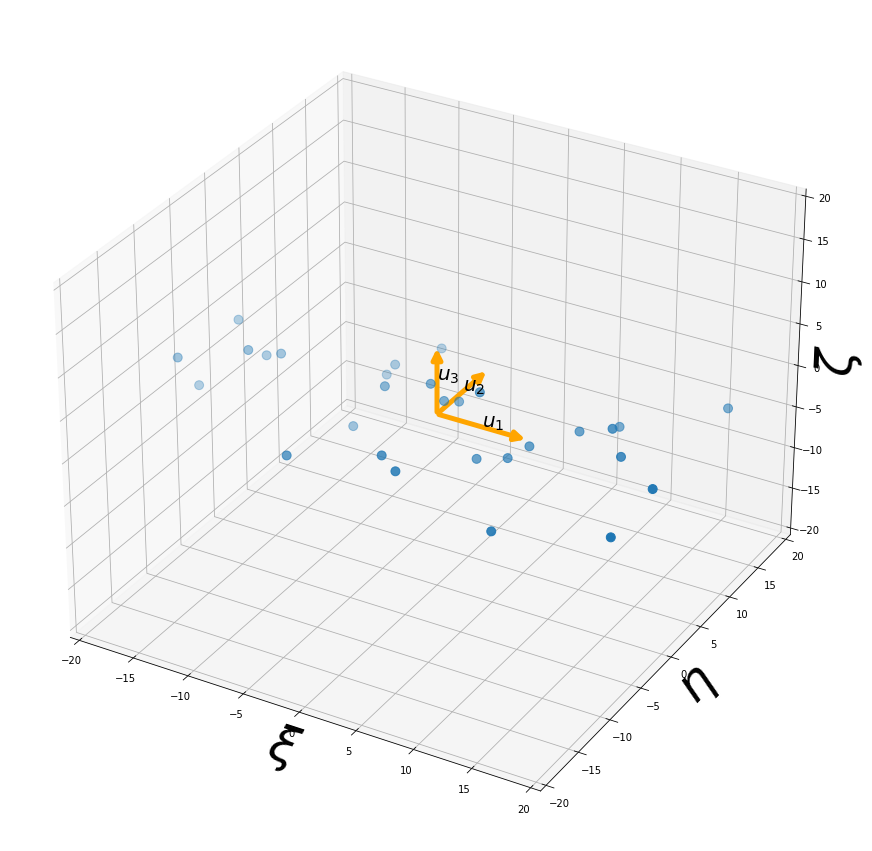

In [18]:
data_pca = np.dot(eigen_vectors.T, data_mean_reduced.T ).T
fig = plt.figure(figsize=(15, 20)) # Square figure 
ax = fig.add_subplot(111, projection='3d') 

ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], marker='o', s=80)

axis_length = 8
ax.arrow3D(0, 0, 0, axis_length, 0, 0, mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, 0, axis_length, 0, mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, 0, 0, axis_length, mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)


ax.text(4, 0, 0, r'$u_1$', fontsize=20)
ax.text(0, 4, 0, r'$u_2$', fontsize=20)
ax.text(0, 0, 4, r'$u_3$', fontsize=20)
ax.set_xlabel(r'$\xi$', fontsize=50, )
ax.set_ylabel(r'$\eta$', fontsize=50)
ax.set_zlabel(r'$\zeta$', fontsize=50)
grid_range = 20

ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
fig.show()

In [19]:
data_pca = np.dot(eigen_vectors, data_mean_reduced.T ).T

In [20]:
labels

NameError: name 'labels' is not defined

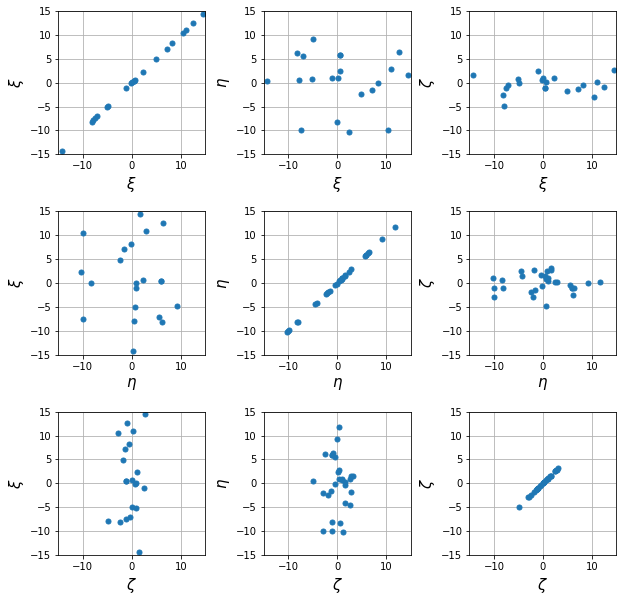

In [21]:
data_pca = np.dot(eigen_vectors.T, data_mean_reduced.T ).T
labels = [r'$\xi$', r'$\eta$', r'$\zeta$']
plt.figure(figsize=(10, 10))

for i in range(data_matrix.shape[1]):
    for j in range(data_matrix.shape[1]):
        plt.subplot(3, 3, 3*i + j + 1)
        plt.subplots_adjust(wspace=0.4,hspace=0.4)
        plt.plot(data_pca[:, i], data_pca[:, j], marker='o',markersize=5, linestyle='none')
        grid_range = 15
        plt.xlabel(labels[i], fontsize=15)
        plt.ylabel(labels[j], fontsize=15)
        plt.xlim(-grid_range, grid_range)
        plt.ylim(-grid_range, grid_range)
        plt.grid(True)
plt.show()

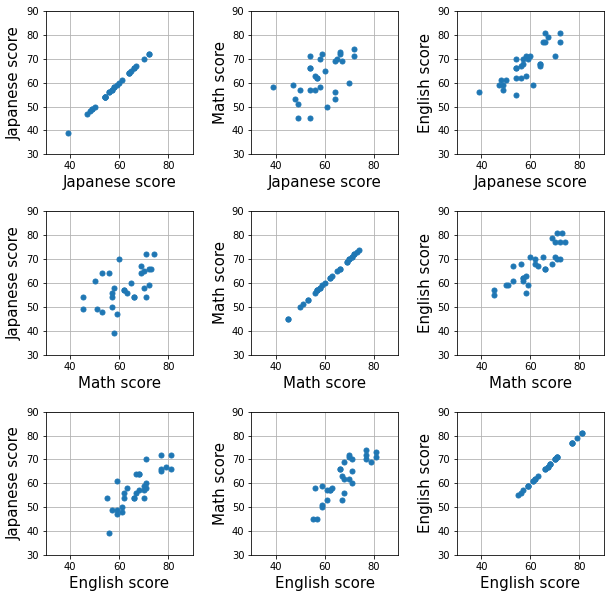

In [22]:
subject_labels = ['Japanese score', 'Math score', 'English score']
plt.figure(figsize=(10, 10))
for i in range(data_matrix.shape[1]):
    for j in range(data_matrix.shape[1]):
        plt.subplot(3, 3, 3*i + j + 1)
        plt.subplots_adjust(wspace=0.4,hspace=0.4)
        plt.plot(data_matrix[:, i], data_matrix[:, j], marker='o',markersize=5, linestyle='none')
        plt.xlabel(subject_labels[i], fontsize=15)
        plt.ylabel(subject_labels[j], fontsize=15)
        plt.xlim(30, 90)
        plt.ylim(30, 90)
        plt.grid(True)
plt.show()

In [23]:
covariance_matrix

array([[60.44888889, 33.62666667, 46.29333333],
       [33.62666667, 68.49333333, 50.92666667],
       [46.29333333, 50.92666667, 53.61      ]])

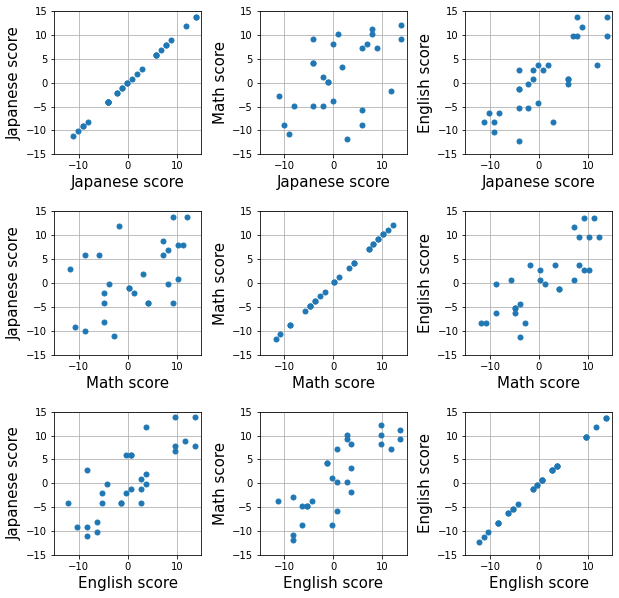

In [24]:
subject_labels = ['Japanese score', 'Math score', 'English score']
plt.figure(figsize=(10, 10))
for i in range(data_matrix.shape[1]):
    for j in range(data_matrix.shape[1]):
        plt.subplot(3, 3, 3*i + j + 1)
        plt.subplots_adjust(wspace=0.4,hspace=0.4)
        plt.plot(data_mean_reduced[:, i], data_mean_reduced[:, j], marker='o',markersize=5, linestyle='none')
        plt.xlabel(subject_labels[i], fontsize=15)
        plt.ylabel(subject_labels[j], fontsize=15)
        grid_range = 15
        plt.xlim(-grid_range, grid_range)
        plt.ylim(-grid_range, grid_range)
        plt.grid(True)
plt.show()

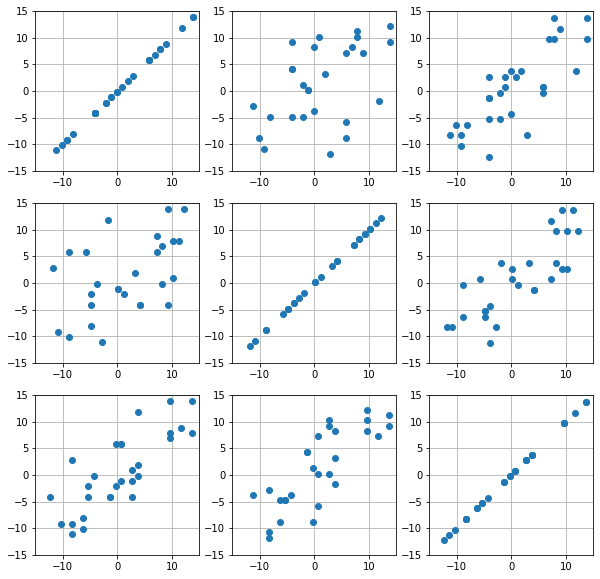

In [25]:
graph_range = 15
plt.figure(figsize=(10, 10))
for i in range(data_mean_reduced.shape[1]):
    for j in range(data_mean_reduced.shape[1]):
        plt.subplot(3, 3, 3*i + j + 1)
        plt.plot(data_mean_reduced[:, i], data_mean_reduced[:, j], marker='o', linestyle='none')
        #plt.axhline(x=0, color='black')
        #plt.axhline(y=0, color='black')
        plt.grid(True)
        plt.xlim(-graph_range, graph_range)
        plt.ylim(-graph_range, graph_range)


plt.show()

In [26]:
data_matrix.shape

(30, 3)

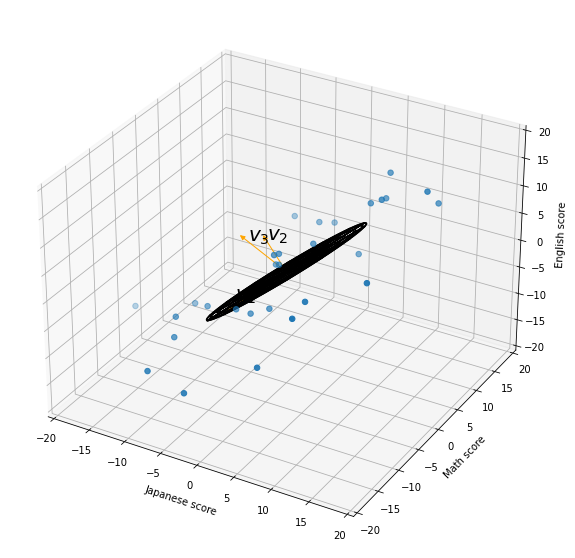

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_mean_reduced[:, 0], data_mean_reduced[:, 1], data_mean_reduced[:, 2], marker='o', s=30)

ax.set_xlabel('Japanese score')
ax.set_ylabel('Math score')
ax.set_zlabel('English score')

ax.arrow3D(0, 0, 0, eigen_vectors.T[0][0]*10, eigen_vectors.T[0][1]*10, eigen_vectors.T[0][2]*10,
                       mutation_scale=10,  arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, eigen_vectors.T[1][0]*10, eigen_vectors.T[1][1]*10, eigen_vectors.T[1][2]*10,
                       mutation_scale=10, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, eigen_vectors.T[2][0]*10, eigen_vectors.T[2][1]*10, eigen_vectors.T[2][2]*10,
                       mutation_scale=10, arrowstyle="-|>", fc='orange', ec='orange')

ax.text(eigen_vectors.T[0][0]*8 , eigen_vectors.T[0][1]*8, eigen_vectors.T[0][2]*8+1, r'$v_1$', fontsize=20)
ax.text(eigen_vectors.T[1][0]*8 , eigen_vectors.T[1][1]*8, eigen_vectors.T[1][2]*8, r'$v_2$', fontsize=20)
ax.text(eigen_vectors.T[2][0]*8 , eigen_vectors.T[2][1]*8, eigen_vectors.T[2][2]*8, r'$v_3$', fontsize=20)

ax.plot_wireframe(x_transformed, y_transformed, x_transformed, color='black',rcount=15, ccount=15) 
grid_range = 20
ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)

plt.show()